In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [69]:
dados = pd.read_excel('Recrutamento.xlsx')
dados.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Yes,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,No,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,No,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Yes,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Yes,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,No,NaN


In [70]:
#É possível mapear colunas de texto na correlação? 
from sklearn.preprocessing import LabelEncoder as le

In [71]:
columns = ['gender','workex','specialisation','status']

In [72]:
#Transformando cada coluna de texto para um formato numérico inteligível para o computador
label_encoder = le()
for col in columns:
    dados[col] = label_encoder.fit_transform(dados[col])

In [73]:
dummy_hsc_s = pd.get_dummies(dados['hsc_s'],prefix='dummy')

In [74]:
dummy_degree_t = pd.get_dummies(dados['degree_t'],prefix='dummy')

In [75]:
dados_dummy = pd.concat([dados, dummy_hsc_s,dummy_degree_t], axis=1)
dados_dummy.head(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,...,specialisation,mba_p,status,salary,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,...,1,58.80,1,270000.0,0,1,0,0,0,1
1,2,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,...,0,66.28,1,200000.0,0,0,1,0,0,1
2,3,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,...,0,57.80,1,250000.0,1,0,0,1,0,0
3,4,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,...,1,59.43,0,NaN,0,0,1,0,0,1
4,5,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,...,0,55.50,1,425000.0,0,1,0,1,0,0


In [76]:
#Importando biblioteca de treino e de teste
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knc

In [77]:
#Segregando Variáveis Dependentes e Independentes (Test)
x = dados_dummy[['ssc_p','hsc_p','degree_p','workex','mba_p']]
y = dados_dummy['status']

In [78]:
dados_dummy.drop(['hsc_s','degree_t', 'salary'], axis=1, inplace=True)

In [86]:
x_train, x_test, y_train, y_test = tts(x,y, test_size=0.2, random_state=42, stratify=y)

In [80]:
#Importando bibliotecas de normalização e padronização dos dados
from sklearn.preprocessing import StandardScaler, MinMaxScaler 

In [81]:
#Criando o método de padronização
scaler = StandardScaler()

In [82]:
scaler.fit(x_train, y_train)

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

In [83]:
#Importando biblioteca SVM
from sklearn.svm import LinearSVC as svm
from sklearn.pipeline import Pipeline as pli 

In [84]:
svm = pli([("linear_svc", svm(C = 1))])

In [88]:
svm.fit(x_train_escalonado, y_train)

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('linear_svc', LinearSVC(C=1))])

In [89]:
y_predict_svm = svm.predict(x_test_escalonado)

In [90]:
from sklearn.metrics import accuracy_score

In [91]:
print(accuracy_score(y_test,y_predict_svm))

0.8604651162790697


ValueError: X has 2 features, but LinearSVC is expecting 5 features as input.

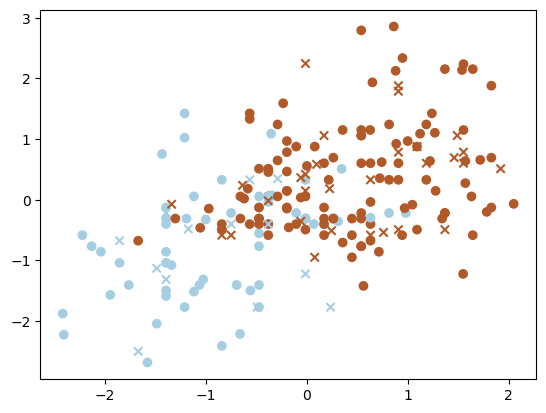

In [108]:
# Plotando os pontos de treinamento
plt.scatter(x_train_escalonado[:, 0], x_train_escalonado[:, 1], c=y_train, cmap=plt.cm.Paired, marker='o', label='Treinamento')

# Plotando os pontos de teste
plt.scatter(x_test_escalonado[:, 0], x_test_escalonado[:, 1], c=y_test, cmap=plt.cm.Paired, marker='x', label='Teste')

# Plotando o hiperplano de separação e margens de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

